In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb
from skimage import io
import random
import glob
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['square', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


original image


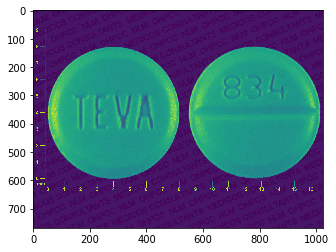

and cut the pills out


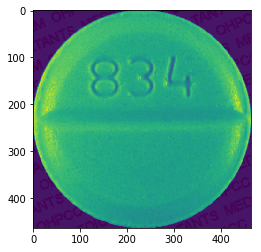

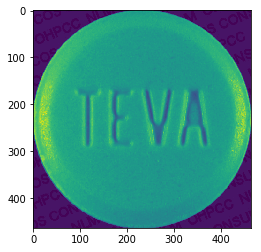

...........
original image


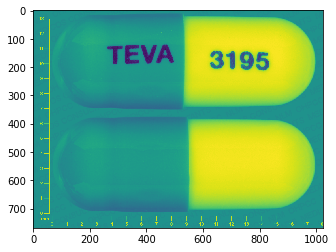

and cut the pills out


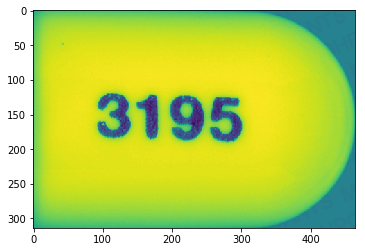

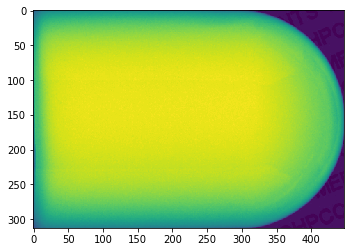

...........
original image


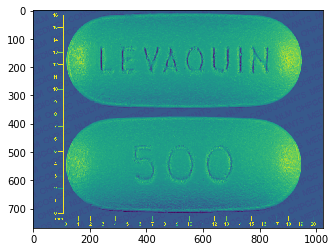

and cut the pills out


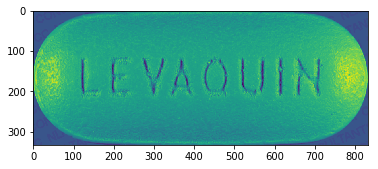

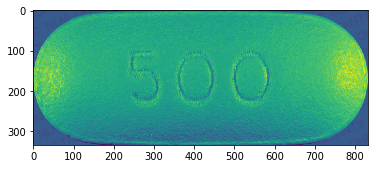

...........
original image


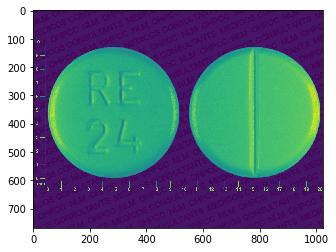

and cut the pills out


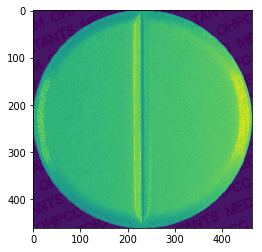

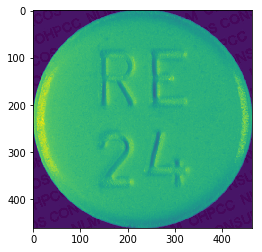

...........


In [4]:
files = glob.glob('../data/*.jpg')
for fn in files:
    print('original image')
    image = io.imread(fn,1, flatten = True)
    plt.imshow(image)
    show()

    # apply threshold
    thresh = threshold_otsu(image)
    bw = closing(image > thresh)

    # remove artifacts connected to image border
    cleared = clear_border(bw)

    # label image regions
    label_image = label(cleared)
    image_label_overlay = label2rgb(label_image, image=image)
    print('and cut the pills out')
    for region in regionprops(label_image):
        # take regions with large enough areas
        if region.area >= 2000:
            # draw rectangle around segmented coins
            minr, minc, maxr, maxc = region.bbox
            plt.imshow(image[minr:maxr,minc:maxc])
            show()
    print('...........')